
Testando topologia: [64]

Testando topologia: [128]

Testando topologia: [64, 64]

Testando topologia: [128, 64]

Testando topologia: [128, 128]


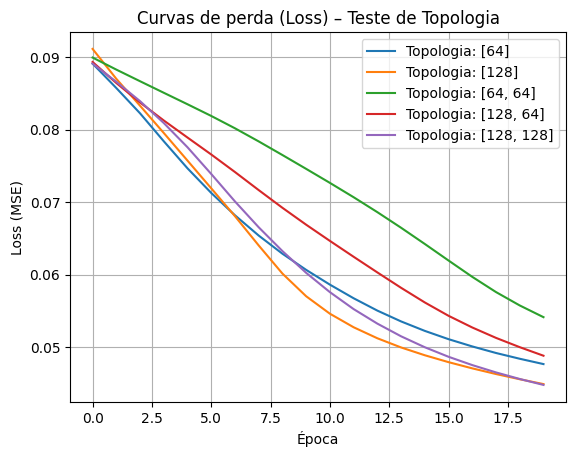

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError

# Dados
(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_train = x_train[:10000]
y_train = y_train[:10000]
y_train = tf.keras.utils.to_categorical(y_train, 10)

# Definições de topologias para testar
topologias = [
    [64],            # 1 camada com 64 neurônios
    [128],           # 1 camada com 128 neurônios
    [64, 64],        # 2 camadas com 64 neurônios cada
    [128, 64],       # 2 camadas, 128 + 64 neurônios
    [128, 128],      # 2 camadas com 128 neurônios
]

def build_model(neurons_per_layer):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for n in neurons_per_layer:
        model.add(Dense(n, activation='relu', kernel_initializer=GlorotUniform(seed=0)))
    model.add(Dense(10, activation='softmax'))
    return model

loss_fn = MeanSquaredError()
results = {}

for topo in topologias:
    print(f"\nTestando topologia: {topo}")
    model = build_model(topo)
    model.compile(optimizer=SGD(learning_rate=0.01),
                  loss=loss_fn,
                  metrics=['mse'])
    history = model.fit(x_train, y_train, epochs=20, verbose=0)
    loss_curve = history.history['loss']
    results[tuple(topo)] = loss_curve
    
    plt.plot(loss_curve, label=f'Topologia: {topo}')

plt.title('Curvas de perda (Loss) – Teste de Topologia')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()
